<b> Name: Ajay Kumar <br>
    Hamoye ID: 147bffea7681f000 </b>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from fbprophet import Prophet

In [2]:
data = pd.read_csv('../input/time-series-forecasting/Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


**Description of Data Set**
* FullDate: Date in format yyyy-mm-dd  hh:mm:ss

* ElecPrice: Prices of electricity charged in Kw per hour

* Gas Price: power generated was done via a gas power plant, gas price is the price of gas at time-T

* SysLoad: Total Load on system or Power consumed at time-T 
* Tmax: maximum temperature at time-T

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


**Column FullDate is object type rest of the features are of float data type.**

In [5]:
data.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

**There are no missing values.**

In [6]:
data.describe() # Gettiing statistcal values of each feature.

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [7]:
data['FullDate']= pd.to_datetime(data['FullDate']) # Converting object type column into datetime column.

In [8]:
data = data.set_index("FullDate") # Converting FullDate column as row indexes.

In [9]:
data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


**Q.11 Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?**

In [10]:
# Sampling Data for a day
day_data = data.resample('D').sum()

In [11]:
day_data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


Text(0, 0.5, 'Electric Price')

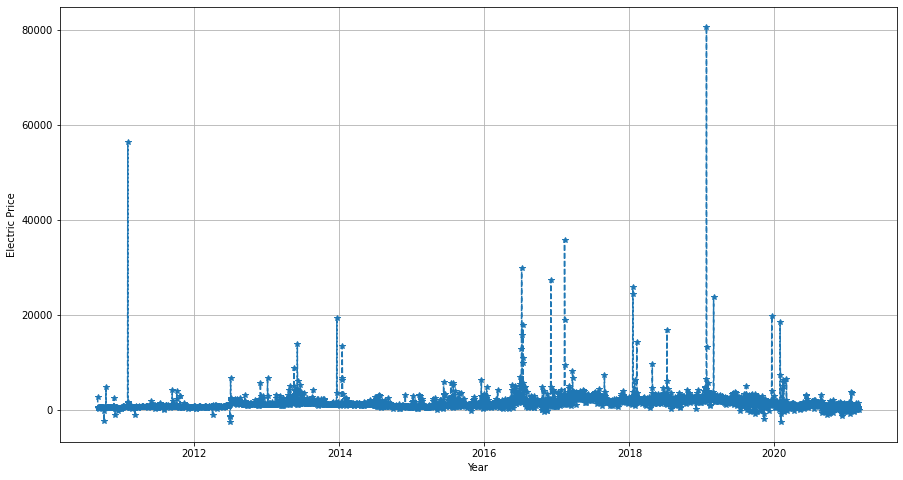

In [12]:
plt.figure(figsize=( 15 , 8 ))
plt.plot(day_data.index, day_data['ElecPrice'], '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Electric Price' )

**Above shown graph provides the answer.**

**Q.12 Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?**

In [13]:
system_result = adfuller(day_data['SysLoad'])
gas_result = adfuller(day_data['GasPrice'])
print(f'SysLoad p-value: {round(system_result[1],6)}')
print(f'GasPrice p-value: {round(gas_result[1],6)}')

SysLoad p-value: 0.004254
GasPrice p-value: 0.045027


**SysLoad p-value: 0.004254
GasPrice p-value: 0.045027**

**Q.13 Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places.**

In [14]:
electricity_result = adfuller(day_data['ElecPrice'])

In [15]:
print('Critical Values:')
print(f'10% of GasPrice : {round(gas_result[4]["10%"],4)}')
print(f'5% of GasPrice : {round(electricity_result[4]["5%"],4)}') 

Critical Values:
10% of GasPrice : -2.5672
5% of GasPrice : -2.8623


**Critical Values are: <br>
10% of GasPrice : -2.5672
5% of GasPrice : -2.8623**

In [16]:
train_data = day_data.iloc[:2757,:]
test_data = day_data.iloc[2757:,:] 

In [17]:
train_data.shape , test_data.shape

((2757, 4), (1077, 4))

In [18]:
train_data.reset_index(inplace = True)
train_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [19]:
df_train = train_data.iloc[:,[0,-1]]

In [20]:
df_train = df_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [21]:
test_data.reset_index(inplace = True)
test_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [22]:
test_df = test_data.iloc[:,[0,-1]]

In [23]:
test_df = test_df.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
test_df.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [24]:
model = Prophet()
model.fit(df_train)

Initial log joint probability = -4.20632


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8006.42   0.000190736       172.415           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        8007.2    4.4511e-05       55.1814      0.8319      0.8319      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       8007.24   0.000127972       100.748   1.491e-06       0.001      313  LS failed, Hessian reset 
     299       8007.56   3.00801e-05       44.3474      0.5552      0.5552      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     351       8007.61   4.26709e-05       140.953   1.449e-07       0.001      531  LS failed, Hessian reset 
     399       8007.64   7.42204e-06       64.1818      0.0646           1      606   
    Iter      log prob        ||dx||      ||grad||       alpha

In [25]:
forecast_values = model.predict(test_df) 
forecast_values.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2685.995282,63.342047,4850.146456,2685.995282,2685.995282,-154.967811,-154.967811,-154.967811,9.737563,9.737563,9.737563,-164.705374,-164.705374,-164.705374,0.0,0.0,0.0,2531.027472
1,2018-03-21,2686.787698,393.158982,5234.235517,2686.787698,2686.787698,-2.473227,-2.473227,-2.473227,159.362662,159.362662,159.362662,-161.835889,-161.835889,-161.835889,0.0,0.0,0.0,2684.314472
2,2018-03-22,2687.580114,648.964608,5216.233990,2687.580114,2687.580114,95.717382,95.717382,95.717382,257.120465,257.120465,257.120465,-161.403083,-161.403083,-161.403083,0.0,0.0,0.0,2783.297497
3,2018-03-23,2688.372531,263.076925,4888.643304,2688.372531,2688.372531,-112.965306,-112.965306,-112.965306,50.276079,50.276079,50.276079,-163.241385,-163.241385,-163.241385,0.0,0.0,0.0,2575.407225
4,2018-03-24,2689.164947,61.342306,4538.900712,2689.164947,2689.164947,-438.563887,-438.563887,-438.563887,-271.455104,-271.455104,-271.455104,-167.108783,-167.108783,-167.108783,0.0,0.0,0.0,2250.601060


**Q.14 Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?**

In [26]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [27]:
MAPE = Metric(test_df['y'],forecast_values['yhat'])
print(f'Mean Average Percentage Error ( MAPE) is: {round(MAPE,2)}')

Mean Average Percentage Error ( MAPE) is: 544.76


**Q.15 What is the RMSE in 2 decimal places?**

In [28]:
from sklearn import metrics

In [29]:
RMSE = np.sqrt(metrics.mean_squared_error(test_df['y'],forecast_values['yhat']))
print(f'RMSE is: {round(RMSE,4)}')

RMSE is: 3208.1698


**Q.16 If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?**

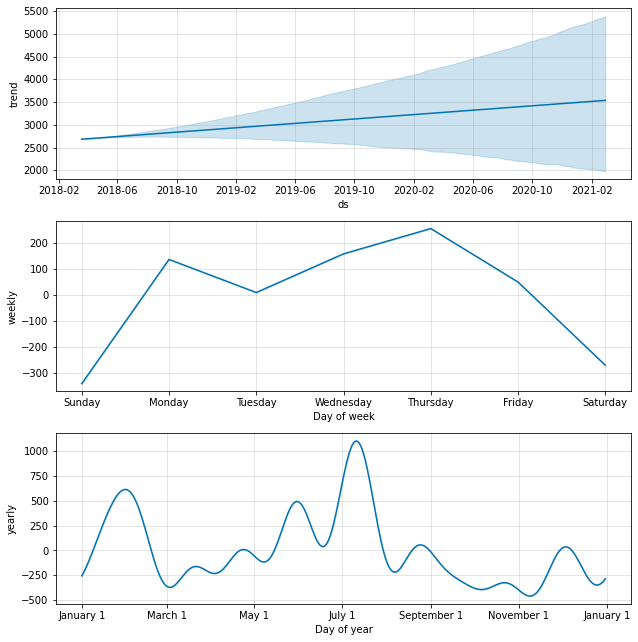

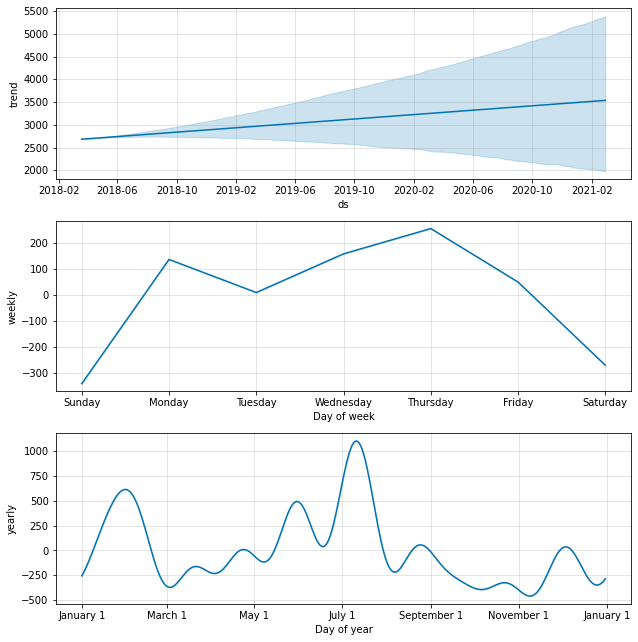

In [30]:
model.plot_components(forecast_values)

**In third graph July month shows of the highest value.**

In [31]:
day_data.reset_index(inplace=True)

In [32]:
day_data.head(3)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.700
1,2010-09-02,369.6,38898.99,88.56,570.810
2,2010-09-03,439.2,41665.76,106.80,504.975


In [33]:
new_day_data = day_data.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3',
                                           'ElecPrice':'y'})

In [34]:
new_day_data.head(3)

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.38,88.56,2751.700
1,2010-09-02,369.6,38898.99,88.56,570.810
2,2010-09-03,439.2,41665.76,106.80,504.975


In [35]:
train_data_new = new_day_data.iloc[:2757,:]
test_data_new = new_day_data.iloc[2757:,:]

In [36]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

In [37]:
model = model.fit(train_data_new)

Initial log joint probability = -4.20632
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8218.46   0.000765413       377.196           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8219.42   0.000181158       126.613           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8219.72   0.000285842       78.9036           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       8219.78   7.57213e-05       255.214   4.419e-07       0.001      431  LS failed, Hessian reset 
     399       8219.86   1.51602e-05       76.2299      0.5333      0.5333      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     443       8219.87   8.26302e-07    

**Q.17 Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?**

In [38]:
forecast_values_new = model.predict(test_data_new)

In [39]:
MAPE = Metric(test_data_new['y'],forecast_values_new['yhat'])
print(f'Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

Mean Average Percentage Error ( MAPE) is:233.56


**Q18. What is the RMSE in 2 decimal places?**

In [40]:
RMSE = np.sqrt(metrics.mean_squared_error(test_data_new['y'],forecast_values_new['yhat']))
print(f'RMSE is: {round(RMSE,2)}')

RMSE is: 2709.4


**Q.19 If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?**

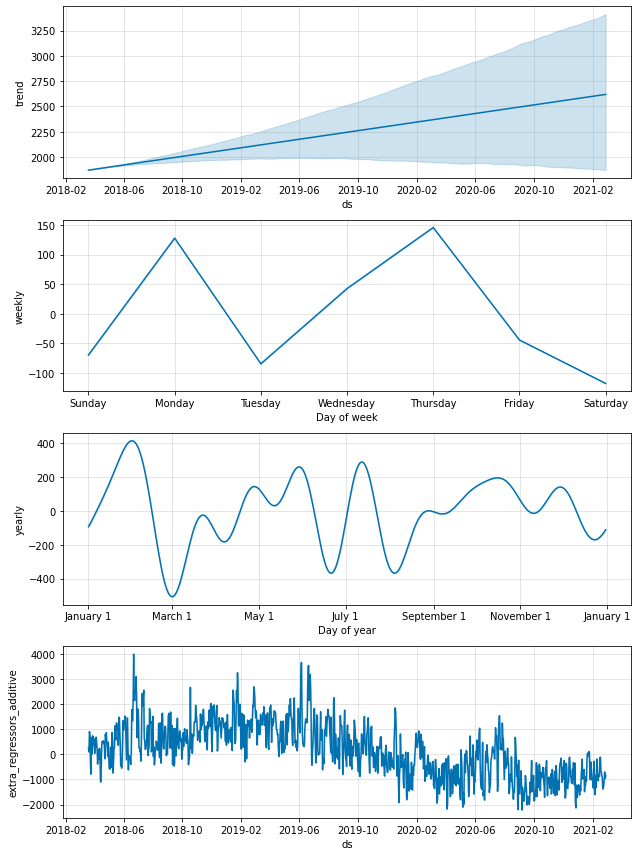

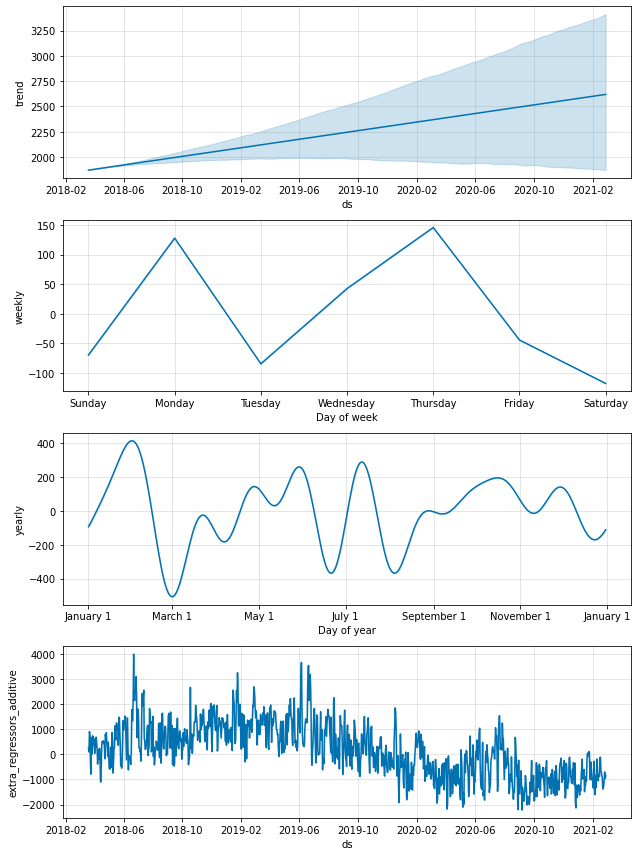

In [41]:
model.plot_components(forecast_values_new)

**From graph second we get our answer as THURSDAY**

In [42]:
day_data.head(3)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.38,88.56,2751.700
1,2010-09-02,369.6,38898.99,88.56,570.810
2,2010-09-03,439.2,41665.76,106.80,504.975


In [43]:
train_data_2 = day_data.iloc[:2757,:]
test_data_2 = day_data.iloc[2757:,:] 

In [44]:
train_data_2.shape , test_data_2.shape

((2757, 5), (1077, 5))

In [45]:
df_train_2 = train_data_2.iloc[:,[0,2,3,4]]
df_test_2 = test_data_2.iloc[:,[0,2,3,4]]

In [46]:
df_train_2 = df_train_2.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})
df_test_2 = df_test_2.rename(columns = {'FullDate':'ds',
                                           'SysLoad':'add1','GasPrice':'add2',
                                           'ElecPrice':'y'})

In [47]:
df_train_2.head()

,ds,add1,add2,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [48]:
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')

In [49]:
model = model.fit(df_train_2)

Initial log joint probability = -4.20632
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8218.62   0.000422017        94.239           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8219.39   5.87059e-05       77.0681        0.28           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       8219.75   0.000787244       97.0431      0.7361      0.7361      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       8219.76   2.35034e-05       104.781   2.094e-07       0.001      409  LS failed, Hessian reset 
     380       8219.85   4.79102e-07       62.7508      0.2411           1      505   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


**Q.20 Train a multivariate time series model performing the same train test split as before, but now exclude T-max from the training data(drop T-max), What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?**

In [50]:
forecast_values_new = model.predict(df_test_2)

In [51]:
MAPE = Metric(df_test_2['y'],forecast_values_new['yhat'])
print(f'Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

Mean Average Percentage Error ( MAPE) is:231.2
